In [74]:
import os
import glob
import re
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.integrate import trapz
from scipy.optimize import curve_fit as cf
from sklearn.neighbors import LocalOutlierFactor
lineal = lambda x,a,b : a*x+b
from scipy.integrate import simps
import matplotlib.pyplot as plt
import matplotlib as mpl

In [75]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [33]:
directorio = '/home/luciano/Escritorio/Labo 4/1 - Ferromagnetismo/files/3minog'
patron = '*.csv'
archivos_csv = glob.glob(os.path.join(directorio, patron))
nombres_archivos= [os.path.basename(archivo) for archivo in archivos_csv]
tiempo_no=[]
for i in range(len(nombres_archivos)):
    resultado=float(re.search(r'(\d+\.\d+)',nombres_archivos[i]).group(1))
    tiempo_no.append(resultado)
tiempo=np.array(sorted(tiempo_no))

In [34]:
def V_0(i):
    df = pd.read_csv(f'/home/luciano/Escritorio/Labo 4/1 - Ferromagnetismo/files/3minog/{tiempo[i]}.csv')
    V_0=df.iloc[:, 0]
    return V_0
def V_h(i):
    df = pd.read_csv(f'/home/luciano/Escritorio/Labo 4/1 - Ferromagnetismo/files/3minog/{tiempo[i]}.csv')
    V_h=np.array(df['V_H'])
    return V_h
def V_bnint(i):
    df = pd.read_csv(f'/home/luciano/Escritorio/Labo 4/1 - Ferromagnetismo/files/3minog/{tiempo[i]}.csv')
    V_bnint=np.array(df['V_Bnint'])
    return V_bnint
def V_b(i):
    df = pd.read_csv(f'/home/luciano/Escritorio/Labo 4/1 - Ferromagnetismo/files/3minog/{tiempo[i]}.csv')
    V_b=np.array(df['V_B'])
    return V_b
def V_PT(i):    #resistencia
    df = pd.read_csv(f'/home/luciano/Escritorio/Labo 4/1 - Ferromagnetismo/files/3minog/{tiempo[i]}.csv')
    V_PT=np.array(df['V_pt'])
    return V_PT
def V_PR(i): #prueba
    df = pd.read_csv(f'/home/luciano/Escritorio/Labo 4/1 - Ferromagnetismo/files/3minog/{tiempo[i]}.csv')
    V_PR=np.array(df['V_pr'])
    return V_PR
def temp(i):
    pars,cov= cf(lineal,V_PT(i)/900,V_PR(i))
    return (pars[0]-100)/0.385 + 273.15


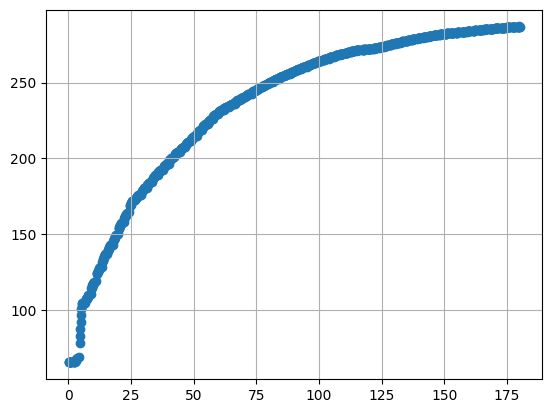

In [35]:
temperaturas_list=[]
for i in range(len(tiempo)):
    temperaturas_list.append(temp(i))
temperaturas=np.array(temperaturas_list)
plt.scatter(tiempo,temperaturas)
plt.grid()

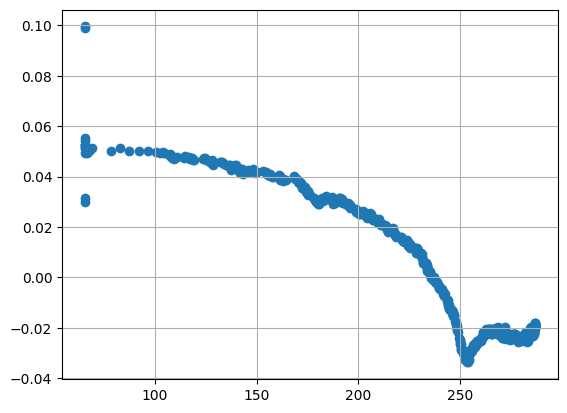

In [151]:
mag_l=[]
for i in range(len(tiempo)):
    mag_l.append(max(V_b(i)))
mag_l
mag=np.array(mag_l)
plt.scatter(temperaturas,mag)
plt.grid()

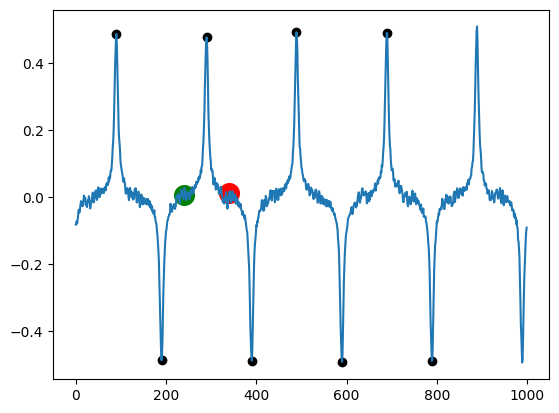

In [149]:
a=1
p_max=find_peaks(V_bnint(a), height=None, threshold=None, distance=None, prominence=0.1, width=None, wlen=None, rel_height=0.5, plateau_size=None)[0]
p_min=find_peaks(-V_bnint(a), height=None, threshold=None, distance=None, prominence=0.1, width=None, wlen=None, rel_height=0.5, plateau_size=None)[0]
b=round(p_max[1]+abs((p_max[1]-p_min[1])/2))
c=round(p_max[1]-abs((p_max[1]-p_min[1])/2))
for i in range(len(p)):
    plt.scatter(V_0(a)[p_max[i]],V_bnint(a)[p_max[i]],color="black")
    plt.scatter(V_0(a)[p_min[i]],V_bnint(a)[p_min[i]],color="black")
plt.plot(V_0(a),V_bnint(a))
plt.scatter(V_0(a)[b],V_bnint(a)[b],color="red",s=200)
plt.scatter(V_0(a)[c],V_bnint(a)[c],color="green",s=200)

In [36]:
def int(a):
    try:
        p_max=find_peaks(V_bnint(a), height=None, threshold=None, distance=None, prominence=0.1, width=None, wlen=None, rel_height=0.5, plateau_size=None)[0]
        p_min=find_peaks(-V_bnint(a), height=None, threshold=None, distance=None, prominence=0.1, width=None, wlen=None, rel_height=0.5, plateau_size=None)[0]
        b=round(p_max[1]+abs((p_max[1]-p_min[1])/2))
        c=round(p_max[1]-abs((p_max[1]-p_min[1])/2))

        tiempo_personalizado = V_0(a)[c:b]  # Ejemplo de datos de tiempo
        senal = V_bnint(a)[c:b]   # Ejemplo de datos de señal
    
    # Integración numérica usando el método del trapecio
        integral = simps(senal, x=tiempo_personalizado)
    except:
        integral=0
    # Crear un nuevo arreglo de tiempo para la integral
    
    # Calcular los valores de la integral para cada punto de tiempo
    return integral


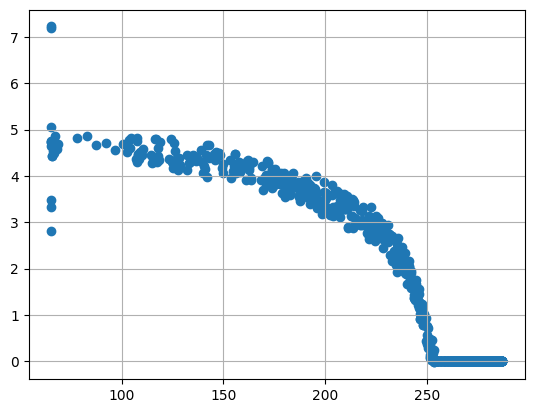

In [37]:
mag_int=[]
for i in range(len(temperaturas)):
    mag_int.append(int(i))
mag_in=np.array(mag_int)
plt.scatter(temperaturas,mag_in)
plt.grid()

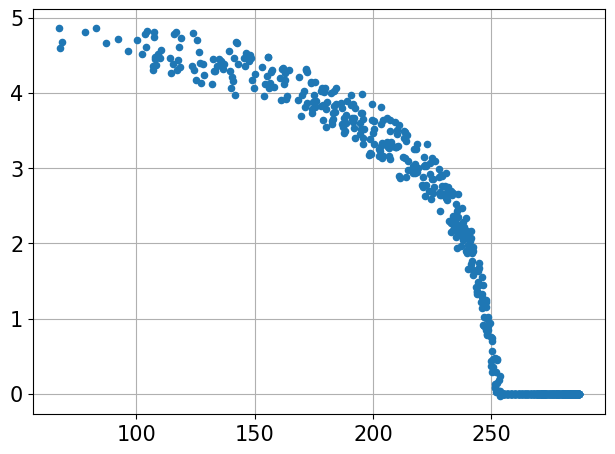

In [175]:
X = temperaturas.reshape(-1, 1)
y = mag_in

# Ajusta el modelo LOF
clf = LocalOutlierFactor(n_neighbors=70)
y_pred = clf.fit_predict(X)

# Filtra los puntos anómalos
X_filtered = X[y_pred == 1].reshape(-1)
y_filtered = y[y_pred == 1]

# Visualiza los datos filtrados
plt.scatter(X_filtered, y_filtered,s=20)
plt.grid()
plt.show()

**Computacional**

In [172]:
def abrir(i):
    return pd.read_csv(f'/home/luciano/Escritorio/Labo 4/1 - Ferromagnetismo/M_{i}.csv')    

df=[]  
for i in range(1,5):
    dfi=abrir(i)
    df.append(dfi)
df= pd.concat(df, ignore_index=False).sort_values(by='T').query('T <= 3').query('T>=0.5')


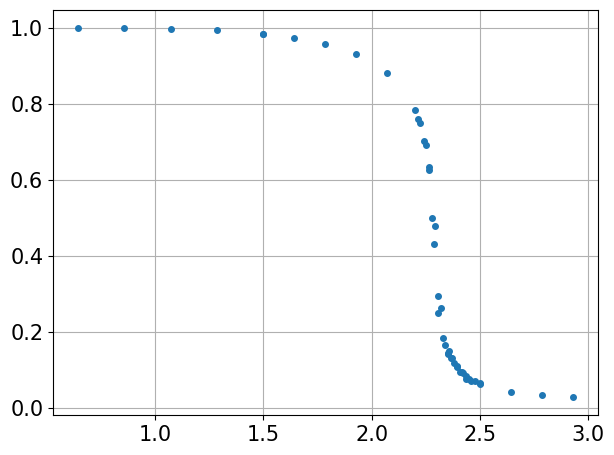

In [173]:
plt.scatter(df['T'],df['M'])
plt.grid()

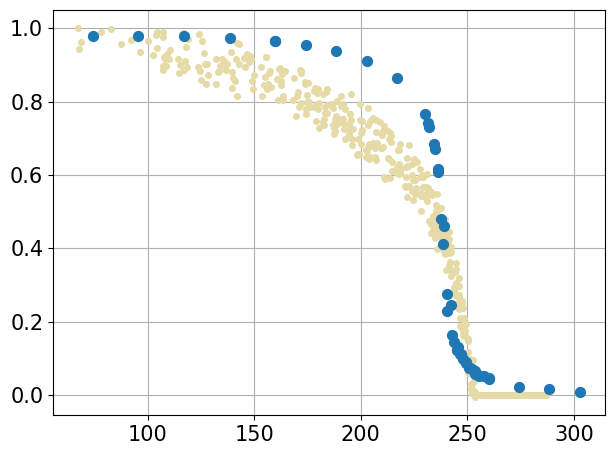

In [174]:
plt.scatter(X_filtered, y_filtered/max(y_filtered), c='#E6DAA6', alpha=1)
plt.scatter(df['T']*100+10,df['M']/max(df['M'])-0.02,s=50)
plt.grid()
plt.show()